In [3]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [4]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
dataset = pd.read_csv("MyDrive/MLData/covtype.data.csv")

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Elevation                           581012 non-null  float64
 1   Aspect                              581012 non-null  float64
 2   Slope                               581012 non-null  float64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  float64
 4   Vertical_Distance_To_Hydrology      581012 non-null  float64
 5   Horizontal_Distance_To_Roadways     581012 non-null  float64
 6   Hillshade_9am                       581012 non-null  int64  
 7   Hillshade_Noon                      581012 non-null  int64  
 8   Hillshade_3pm                       581012 non-null  int64  
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  float64
 10  Wilderness_Area1                    581012 non-null  int64  
 11  Wilderness_Area2          

In [7]:
dataset.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596.0,51.0,3.0,258.0,0.0,510.0,221,232,148,6279.0,...,0,0,0,0,0,0,0,0,0,5
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220,235,151,6225.0,...,0,0,0,0,0,0,0,0,0,5
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234,238,135,6121.0,...,0,0,0,0,0,0,0,0,0,2
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238,238,122,6211.0,...,0,0,0,0,0,0,0,0,0,2
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220,234,150,6172.0,...,0,0,0,0,0,0,0,0,0,5


In [8]:
dataset.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


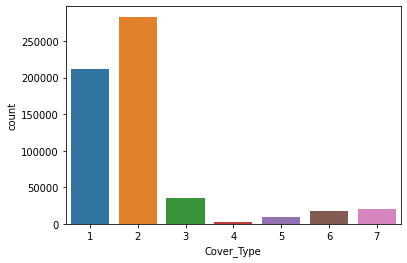

In [9]:
sns.countplot(x=dataset['Cover_Type'], label='Count')
plt.show()

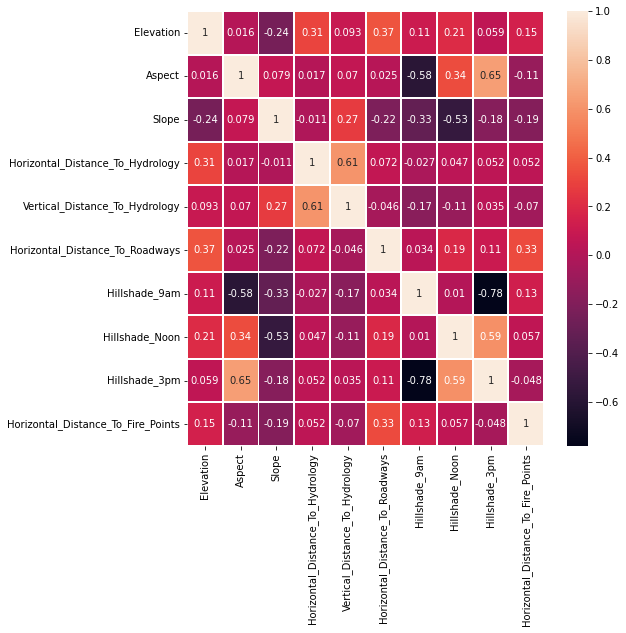

In [10]:
#Sub-dataset of continuous variables 
data_sub1=dataset.loc[:,'Elevation':'Horizontal_Distance_To_Fire_Points']
plt.figure(figsize=(8,8))
sns.heatmap(data_sub1.corr(),linecolor='white',linewidth=1,
            annot=True)
#g = sns.PairGrid(data_sub1)
#g.map(plt.scatter)

In [11]:
#Splitting dataset
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = \
  train_test_split(x,y,test_size=0.1,random_state=0)

In [12]:
len(x_train[0])

54

In [13]:
acc_table={}
#Random Forest Model
from sklearn.ensemble import RandomForestClassifier
class_rm = RandomForestClassifier(random_state=0, class_weight='balanced')
class_rm.fit(x_train,y_train)

RandomForestClassifier(class_weight='balanced', random_state=0)

In [14]:
#Metrics and Cross Validation
from sklearn.metrics import accuracy_score,\
  confusion_matrix, f1_score, precision_score,recall_score
y_pred = class_rm.predict(x_test)
acc  = accuracy_score (y_test,y_pred)
#f1   = f1_score       (y_test,y_pred)
#prec = precision_score(y_test,y_pred)
#rec  = recall_score   (y_test,y_pred)
acc_table['RandomForest']=acc

In [15]:
acc

0.9588998657533303

In [16]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [17]:
cm

array([[20021,  1008,     1,     0,     3,     3,    36],
       [  583, 27733,    57,     0,    37,    25,     6],
       [    0,    61,  3427,    10,     4,    65,     0],
       [    0,     0,    36,   256,     0,     5,     0],
       [    6,   166,     7,     0,   742,     4,     0],
       [    1,    50,   109,     9,     0,  1580,     0],
       [   77,    19,     0,     0,     0,     0,  1955]])

Text(0.5, 15.0, 'Predicted Values')

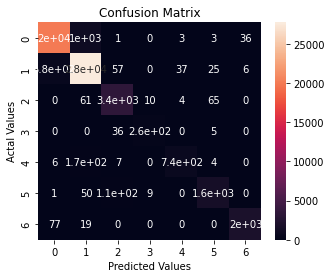

In [18]:
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cm,index = range(7), 
                      columns = range(7))
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')

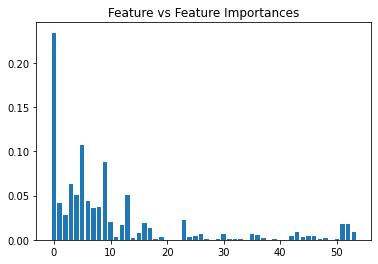

In [19]:
fig, ax = plt.subplots()
ax.bar(np.arange(54),class_rm.feature_importances_)
ax.set_title("Feature vs Feature Importances")
plt.show()

In [20]:
dataset.columns[:-1]

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40

In [21]:
#Gradient Boosted Decison Trees Model
#from sklearn.ensemble import GradientBoostingClassifier
#class_gb = GradientBoostingClassifier(random_state=0, n_estimators=20)
#class_gb.fit(x_train,y_train)
#--------------Long runtime----------
#Hist Gradient Boosted Decison Trees Model
from sklearn.tree import DecisionTreeClassifier
class_dt = DecisionTreeClassifier(random_state=0)
class_dt.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [22]:
y_pred = class_dt.predict(x_test)
acc  = accuracy_score (y_test,y_pred)
acc
acc_table['DecisionTree']=acc

In [23]:
from sklearn.neural_network import MLPClassifier
layers = [54,20,20]
class_mlp = MLPClassifier(random_state=0,hidden_layer_sizes=layers,
                          )
class_mlp.fit(x_train[::15],y_train[::15])

MLPClassifier(hidden_layer_sizes=[54, 20, 20], random_state=0)

In [24]:
y_pred_train= class_mlp.predict(x_train)
y_pred_test = class_mlp.predict(x_test)
acc_ts = accuracy_score(y_test,y_pred_test)
acc_ts
acc_tr = accuracy_score(y_train,y_pred_train)
print("Accuracy Train: {:5f} Test {:5f}".format(acc_tr,acc_ts))
acc_table['NeuralNet']=acc_ts

Accuracy Train: 0.733989 Test 0.734123


In [25]:
from sklearn.ensemble import AdaBoostClassifier
class_adb = AdaBoostClassifier(random_state=0,base_estimator=class_dt)
class_adb.fit(x_train,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=0),
                   random_state=0)

In [26]:
print(class_adb)
y_pred_train= class_adb.predict(x_train)
y_pred_test = class_adb.predict(x_test)
acc_ts = accuracy_score(y_test,y_pred_test)
acc_ts
acc_tr = accuracy_score(y_train,y_pred_train)
print("Accuracy Train: {:5f} Test {:5f}".format(acc_tr,acc_ts))
acc_table['AdaBoost']=acc_ts


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=0),
                   random_state=0)
Accuracy Train: 1.000000 Test 0.942962


In [27]:
#KNN CLassifier
from sklearn.neighbors import KNeighborsClassifier
%time
class_knn = KNeighborsClassifier(n_neighbors=5,n_jobs=-1,weights='distance')
x_train_knn = x_train[::1]
y_train_knn = y_train[::1]
x_test_knn  = x_test [::50]
y_test_knn  = y_test [::50]

class_knn.fit(x_train_knn,y_train_knn)
#print(class_knn)
#print(class_knn.score(x_test[::1],y_test[::1]))

#y_pred_train= class_knn.predict(x_train_knn)
y_pred_test = class_knn.predict(x_test_knn)
acc_ts = accuracy_score(y_test_knn,y_pred_test)
acc_tr = 0 #accuracy_score(y_train_knn,y_pred_train)
print("Accuracy Train: {:5f} Test {:5f}".format(acc_tr,acc_ts))
acc_table['KNN']=acc_ts

#neighbors = (5,)
#knn_train_acc = np.empty(len(neighbors))
#knn_test_acc  = np.empty(len(neighbors))
#for i,k in enumerate(neighbors):
#  class_knn = KNeighborsClassifier(n_neighbors=k,weights='uniform')
#  class_knn.fit(x_train,y_train)
#  y_pred_train = class_knn.predict(x_train)
#  y_pred_test  = class_knn.predict(x_test)
  
#  train_accuracy[i] = accuracy_score(y_test,y_pred_train)
#  test_accuracy [i] = accuracy_score(y_test,y_pred_test)

CPU times: user 5 µs, sys: 1e+03 ns, total: 6 µs
Wall time: 25 µs
Accuracy Train: 0.000000 Test 0.978504


In [28]:
acc_table
acc_table2={"Algorithm":acc_table.keys(),"Accuracy":acc_table.values()}
results = pd.DataFrame(acc_table2)

In [29]:
results

,Algorithm,Accuracy
0,RandomForest,0.958900
1,DecisionTree,0.943479
2,NeuralNet,0.734123
3,AdaBoost,0.942962
4,KNN,0.978504
